In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("adult.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


In [9]:
df = df.replace('?', np.NaN)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [10]:
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [11]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [14]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
        'hours.per.week', 'income'],
       dtype='object'),
 dtype('O'): Index(['workclass', 'education', 'marital.status', 'occupation',
        'relationship', 'race', 'sex', 'native.country'],
       dtype='object')}

In [15]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.008957
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.335286
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,0.221196
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.150053
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,0.229480
income,0.241998,-0.008957,0.335286,0.221196,0.150053,0.229480,1.000000


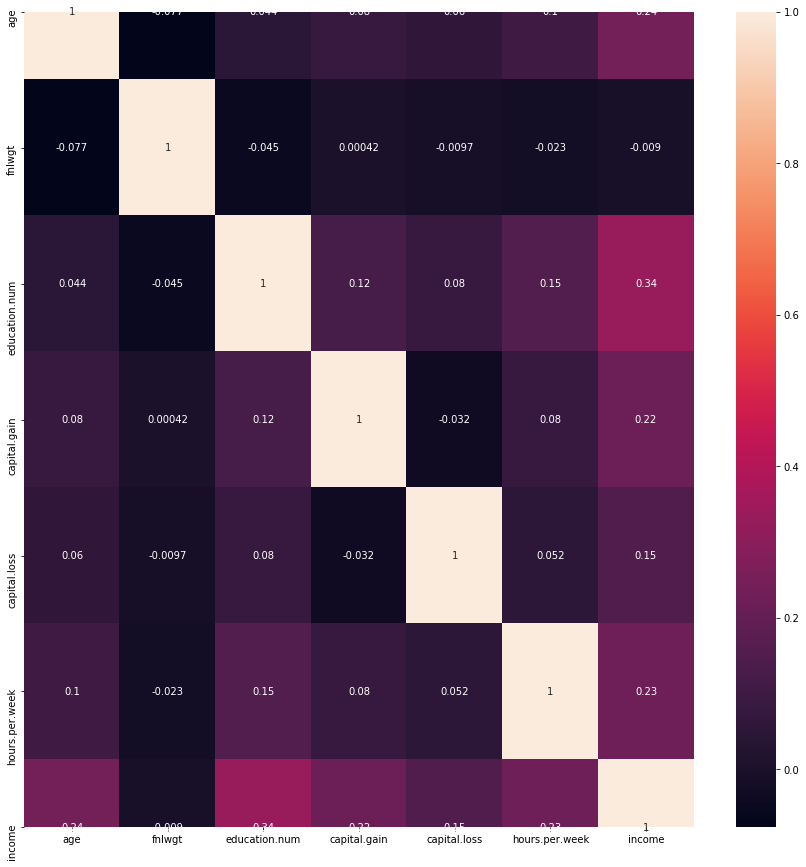

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [17]:
num_df = df.select_dtypes(exclude=['object'])
num_df.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [18]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [19]:
cat_df = df.select_dtypes(include=['object'])
cat_df.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


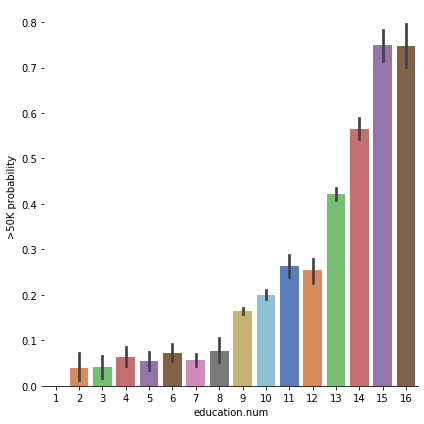

In [20]:
g = sns.factorplot(x="education.num",y="income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

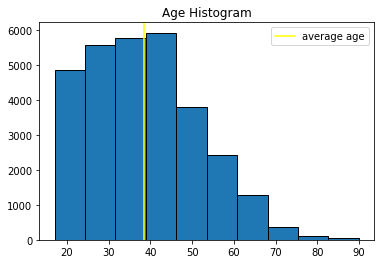

In [21]:

plt.hist(df['age'], edgecolor='black')
plt.title('Age Histogram')
plt.axvline(np.mean(df['age']), color='yellow', label='average age')
plt.legend()

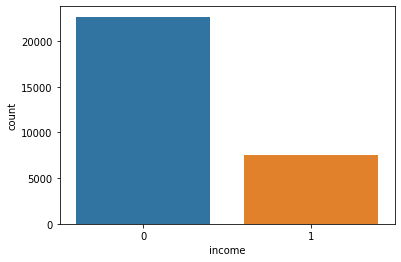

In [22]:
sns.countplot(df['income'],label="Count")
plt.show()

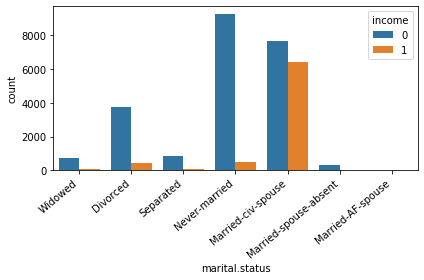

In [23]:
ax = sns.countplot(df['marital.status'], hue=df['income'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001319B7C9988>,
      dtype=object)

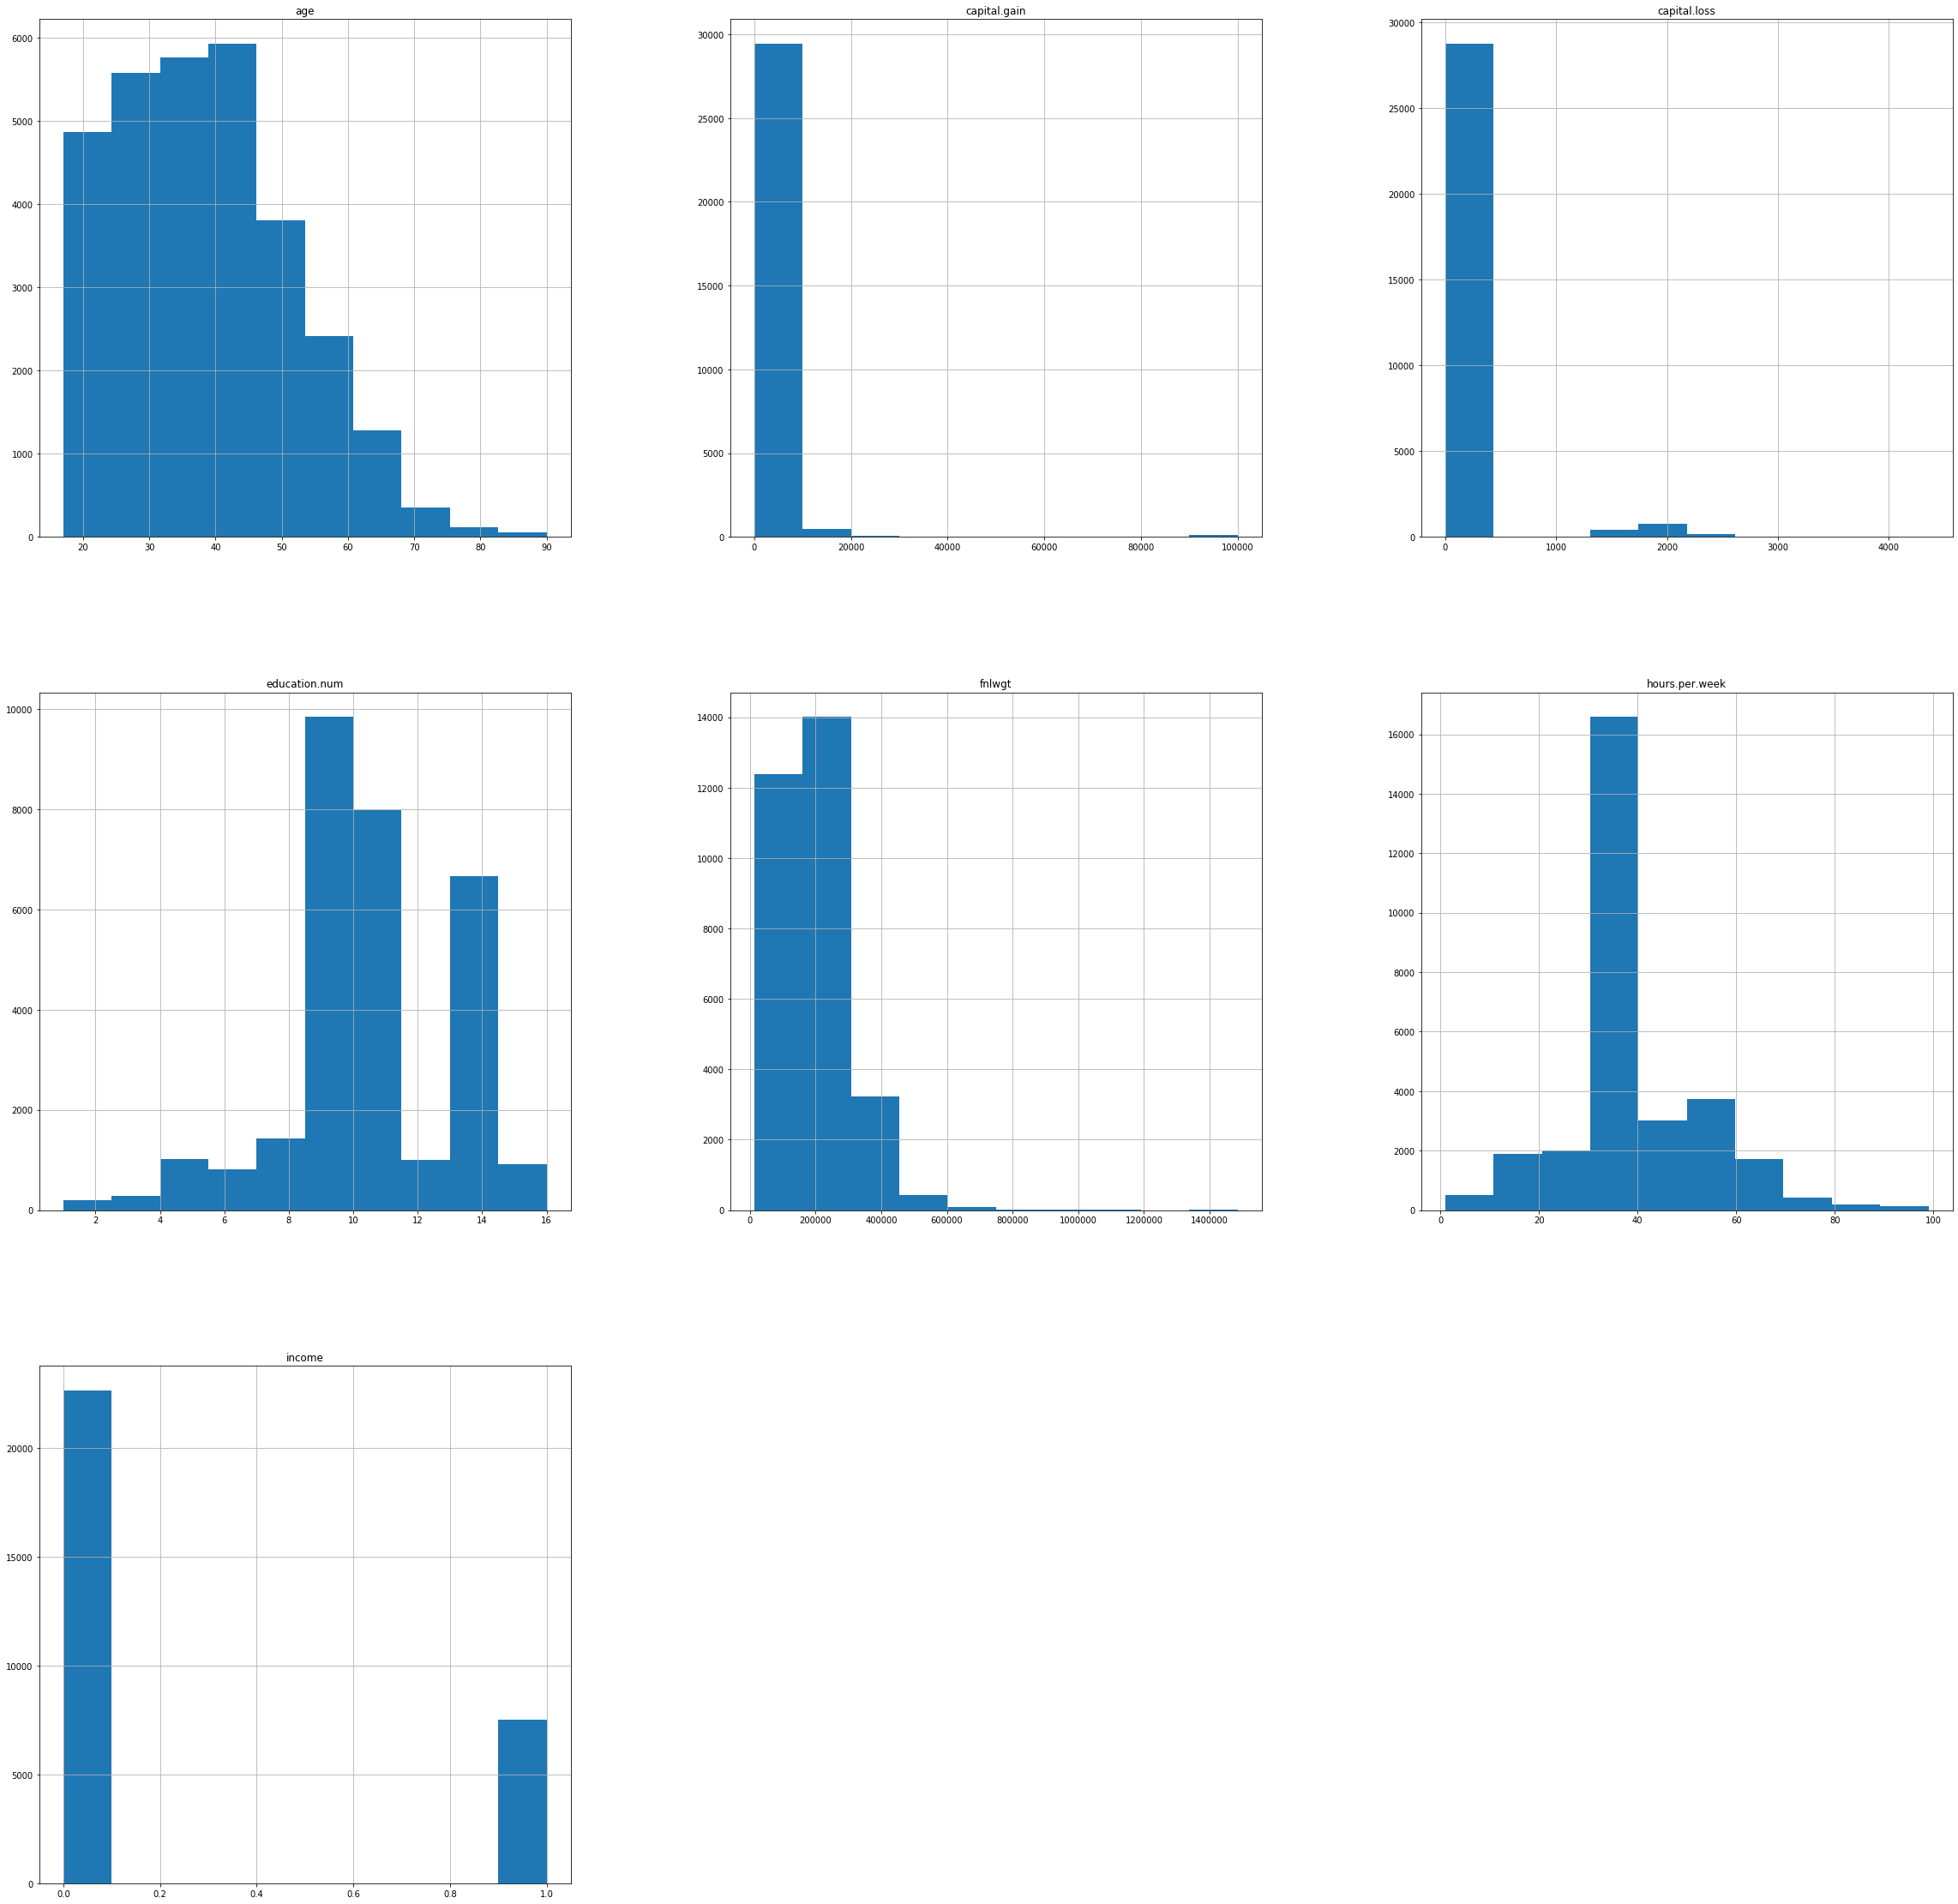

In [24]:
df.hist(figsize=(40,40))

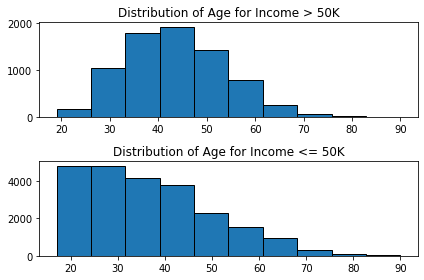

In [25]:
age50k = df[df['income']==1].age
agel50k = df[df['income']==0].age

fig, axs = plt.subplots(2, 1)

axs[0].hist(age50k, edgecolor='black')
axs[0].set_title('Distribution of Age for Income > 50K')

axs[1].hist(agel50k, edgecolor='black')
axs[1].set_title('Distribution of Age for Income <= 50K')
plt.tight_layout()

In [26]:
df['marital.status'] = df['marital.status'].replace(['Widowed', 'Divorced', 'Separated', 'Never-married'], 'single')

df['marital.status'] = df['marital.status'].replace(['Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse'], 'married')

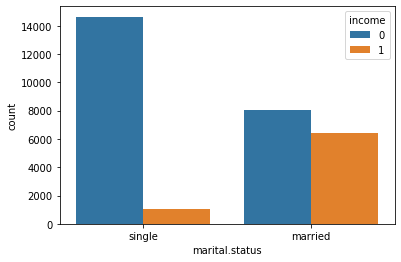

In [27]:
sns.countplot(df['marital.status'], hue=df['income'])

Text(0.5, 1.0, '')

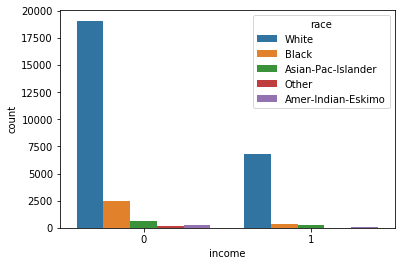

In [28]:
ax = sns.countplot(df['income'], hue=df['race'])
ax.set_title('')

In [29]:
enc = LabelEncoder()
cat_df = cat_df.apply(enc.fit_transform)
cat_df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,2,11,6,3,1,4,0,38
3,2,5,0,6,4,4,0,38
4,2,15,5,9,3,4,0,38
5,2,11,0,7,4,4,0,38
6,2,0,5,0,4,4,1,38


In [30]:
df = df.drop(cat_df.columns, axis=1)
df = pd.concat([df, cat_df], axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,82,132870,9,0,4356,18,0,2,11,6,3,1,4,0,38
3,54,140359,4,0,3900,40,0,2,5,0,6,4,4,0,38
4,41,264663,10,0,3900,40,0,2,15,5,9,3,4,0,38
5,34,216864,9,0,3770,45,0,2,11,0,7,4,4,0,38
6,38,150601,6,0,3770,40,0,2,0,5,0,4,4,1,38


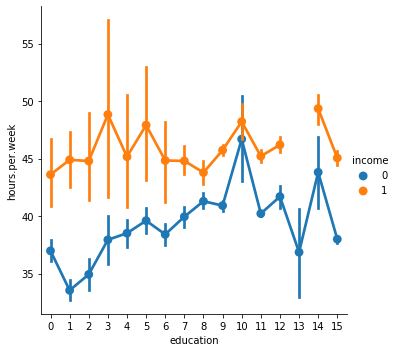

In [31]:
sns.factorplot(data=df, x='education', y='hours.per.week', hue='income', kind='point')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


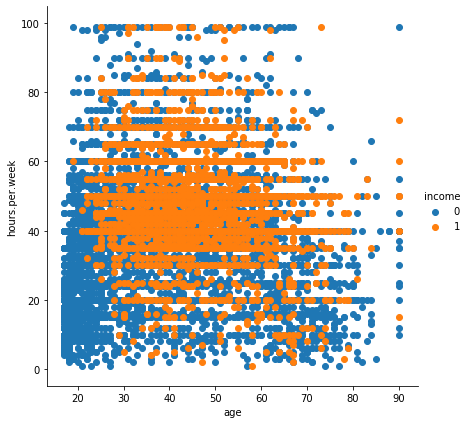

In [32]:
sns.FacetGrid(data=df, hue='income', size=6).map(plt.scatter, 'age', 'hours.per.week').add_legend()
#1. Maximum people between the age of 25 to 80 earn more than 50K as income
#2. Most people which work atleast 36 to 70 hours a week earn more than 50K
#3. Most people under the age of 20 earn less than as m50K income

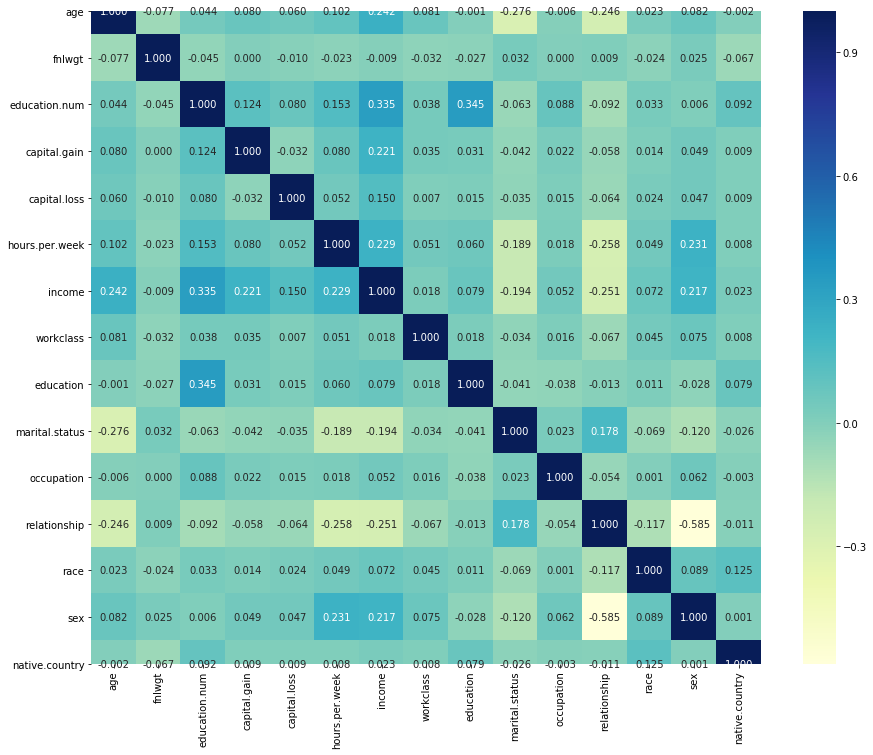

In [33]:
plt.figure(figsize=(15,12))
cor_map = df.corr()
sns.heatmap(cor_map, annot=True, fmt='.3f', cmap='YlGnBu')

In [34]:
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

age                0.530228
fnlwgt             1.459220
education.num     -0.305379
capital.gain      11.902682
capital.loss       4.526380
hours.per.week     0.330869
income             1.161408
workclass          1.154858
education         -0.944948
marital.status    -0.009453
occupation         0.110450
relationship       0.820311
race              -2.507036
sex               -0.750636
native.country    -4.178907
dtype: float64
Total count of numeric features:  15
count of features which are significantly skewed:  11


In [35]:
df_x= df.drop('income', axis=1)
y = df['income']

In [36]:
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])

In [37]:
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

age              -0.139306
fnlwgt           -0.667435
education.num    -0.305379
capital.gain      3.073208
capital.loss      4.272387
hours.per.week    0.330869
workclass         1.229507
education         0.157945
marital.status   -0.009453
occupation        0.110450
relationship      0.317906
race             -2.184038
sex              -0.750636
native.country   -3.565934
dtype: float64
Total count of numeric features:  14
count of features which are significantly skewed:  7


In [38]:
print(df_x.dtypes.loc[df_x.dtypes=="object"])

Series([], dtype: object)


In [39]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [40]:
df_x

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,4.418841,139.172371,9,0.0,8.379539,18,1.206949,121,6,3,0.693147,16,0,1444
3,4.007333,140.469094,4,0.0,8.268988,40,1.206949,25,0,6,1.609438,16,0,1444
4,3.737670,155.905599,10,0.0,8.268988,40,1.206949,225,5,9,1.386294,16,0,1444
5,3.555348,150.971114,9,0.0,8.235095,45,1.206949,121,0,7,1.609438,16,0,1444
6,3.663562,142.143523,6,0.0,8.235095,40,1.206949,0,5,0,1.609438,16,1,1444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.135494,159.891498,10,0.0,0.000000,40,1.206949,225,4,10,0.693147,16,1,1444
32557,3.332205,155.202005,12,0.0,0.000000,38,1.206949,49,2,12,1.791759,16,0,1444
32558,3.713572,142.734154,9,0.0,0.000000,40,1.206949,121,2,6,0.000000,16,1,1444
32559,4.077537,142.349957,9,0.0,0.000000,40,1.206949,121,6,0,1.609438,16,0,1444


In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [44]:
print(x_train.shape,x_test.shape)

(21113, 14) (9049, 14)


In [45]:
print(y_train.shape,y_test.shape)

(21113,) (9049,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini', random_state=21, max_depth=10)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=24)
GBC=GradientBoostingClassifier(n_estimators=100,random_state=24)
ABC=AdaBoostClassifier(random_state=24)
ETC=ExtraTreesClassifier(random_state=24)

In [47]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [48]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.8232953917559951


Cross_Val_Score =  0.7919286097295233


roc_auc_score =  0.7514302099113311


classification_report
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      6797
           1       0.66      0.61      0.63      2252

    accuracy                           0.82      9049
   macro avg       0.76      0.75      0.76      9049
weighted avg       0.82      0.82      0.82      9049



[[6080  717]
 [ 882 1370]]


*********************** SVC ***********************




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy_score =  0.8449552436733341




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Cross_Val_Score =  0.7876202761174513


roc_auc_score =  0.7466966083929515


classification_report
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      6797
           1       0.76      0.55      0.64      2252

    accuracy                           0.84      9049
   macro avg       0.81      0.75      0.77      9049
weighted avg       0.84      0.84      0.84      9049



[[6405  392]
 [1011 1241]]


*********************** LogisticRegression ***********************




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score =  0.829373411426677




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross_Val_Score =  0.7953394094318353


roc_auc_score =  0.7177665101963541


classification_report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      6797
           1       0.73      0.50      0.59      2252

    accuracy                           0.83      9049
   macro avg       0.79      0.72      0.74      9049
weighted avg       0.82      0.83      0.82      9049



[[6389  408]
 [1136 1116]]


*********************** DecisionTreeClassifier ***********************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=21, splitter='best')


Accuracy_score =  0.8511437727925738


Cross_Val_Score =  0.79057

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=24, verbose=0,
                     warm_start=False)


Accuracy_score =  0.8351199027516852


Cross_Val_Score =  0.7799620369097389


roc_auc_score =  0.750987401452579


classification_report
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      6797
           1       0.70      0.58      0.64      2252

    accuracy                           0.84      9049
   macro avg       0.79      0.75      0.77      9049
weighted avg       0.83      0.84      0.83      9049



[[6243  554]
 [ 938 1314]]


*********************** Ad

In [49]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,82.329539,79.192861,75.143021
1,SVC,84.495524,78.762028,74.669661
2,LogisticRegression,82.937341,79.533941,71.776651
3,DecisionTreeClassifier,85.114377,79.057100,76.803778
4,GaussianNB,80.760305,79.003812,74.721987
5,RandomForestClassifier,85.976351,79.282636,78.491033
6,GradientBoostingClassifier,86.285777,79.441761,77.464763
7,ExtraTreesClassifier,83.511990,77.996204,75.098740
8,AdaBoostClassifier,86.053708,79.455109,77.503285


In [51]:
from sklearn.externals import joblib
joblib.dump(ABC,'Income.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Income.csv']

In [52]:
model=joblib.load('Income.csv')
model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)